In [179]:
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, RandomRotation, RandomTranslation, RandomZoom, Dropout, Flatten, Dense
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
! pip install huggingface_hub
from huggingface_hub import from_pretrained_keras
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_y = tensorflow.keras.utils.to_categorical(train_y, 10)
test_y = tensorflow.keras.utils.to_categorical(test_y, 10)



In [181]:
decoder = from_pretrained_keras("vladimirchabanov/mnist_decoder")

for layer in decoder.layers:
  layer.trainable = False


config.json not found in HuggingFace Hub.


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

In [182]:
decoder.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 49)]              0         
                                                                 
 dense_47 (Dense)            (None, 64)                3200      
                                                                 
 dense_48 (Dense)            (None, 784)               50960     
                                                                 
 reshape_7 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 54,160
Trainable params: 0
Non-trainable params: 54,160
_________________________________________________________________


In [ ]:
from keras.utils.vis_utils import plot_model

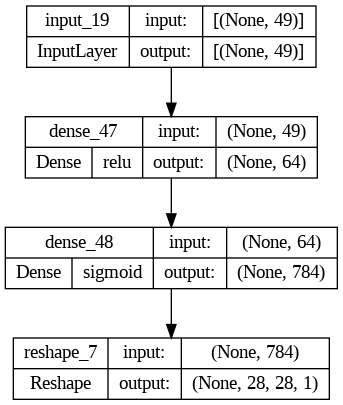

In [185]:

plot_model(decoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [187]:
#Создадим encoder
x = Input(shape=(10,))
encoder = Dense(49, activation='relu')(x)
encoder_model = Model(x, encoder)



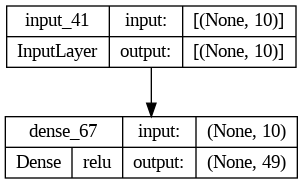

In [190]:
plot_model(encoder_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [192]:
#Создаем autoencoder
autoencoder = Model(x, decoder(encoder_model(x)))

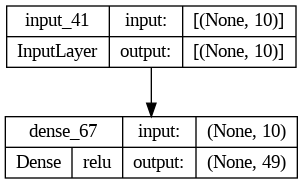

In [193]:
plot_model(encoder_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [194]:
autoencoder.summary()

Model: "model_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 10)]              0         
                                                                 
 model_51 (Functional)       (None, 49)                539       
                                                                 
 model_20 (Functional)       (None, 28, 28, 1)         54160     
                                                                 
Total params: 54,699
Trainable params: 539
Non-trainable params: 54,160
_________________________________________________________________


In [197]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [213]:
autoencoder.fit(train_y, train_x, epochs=10, batch_size=1000, validation_data=(test_y, test_x))

Epoch 1/10
60/60 [==============================] - 1s 11ms/step - loss: 13327.3203 - val_loss: 13330.5859
Epoch 2/10
60/60 [==============================] - 1s 11ms/step - loss: 13327.1436 - val_loss: 13330.4043
Epoch 3/10
60/60 [==============================] - 1s 11ms/step - loss: 13326.9678 - val_loss: 13330.2305
Epoch 4/10
60/60 [==============================] - 1s 11ms/step - loss: 13326.7979 - val_loss: 13330.0664
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 13326.6357 - val_loss: 13329.9053
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 13326.4766 - val_loss: 13329.7549
Epoch 7/10
60/60 [==============================] - 1s 16ms/step - loss: 13326.3271 - val_loss: 13329.5996
Epoch 8/10
60/60 [==============================] - 1s 11ms/step - loss: 13326.1777 - val_loss: 13329.4531
Epoch 9/10
60/60 [==============================] - 1s 11ms/step - loss: 13326.0312 - val_loss: 13329.3096
Epoch 10/10
60/60 [==================

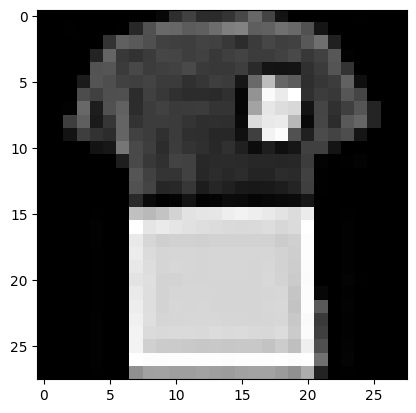

In [216]:
i = 120
plt.imshow(x_test[i], cmap='gray')

1/1 [==============================] - 0s 22ms/step


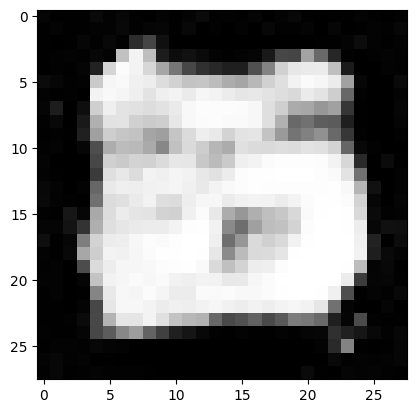

In [217]:

plt.imshow(autoencoder.predict(test_y[i-1:i]).squeeze(), cmap='gray')

In [218]:
autoencoder.save("model.pb")